## Пример №1

In [1]:
import numpy as np

In [2]:
etalons = np.array([
    [-1, -1, 1, -1, 1],
    [1, -1, 1, -1, 1],
    [-1, 1, -1, 1, -1],
    [1, 1, 1, -1, -1]
])

objects = np.array([
    [-1, -1, -1, -1, 1],
    [1, -1, 1, -1, -1],
    [-1, 1, -1, -1, -1],
    [-1, 1, -1, -1, -1]
])

size = etalons.shape[1]

In [3]:
weights = etalons.T @ etalons

np.fill_diagonal(weights, 0)

weights

array([[ 0,  0,  2, -2,  0],
       [ 0,  0, -2,  2, -4],
       [ 2, -2,  0, -4,  2],
       [-2,  2, -4,  0, -2],
       [ 0, -4,  2, -2,  0]])

In [4]:
def restore_pattern(noisy_pattern, weights, max_iterations, iteration=0):
    if iteration >= max_iterations:
        return noisy_pattern
	
    updated_pattern = np.sign(noisy_pattern @ weights)
    updated_pattern[updated_pattern == 0] = 1

    if np.array_equal(noisy_pattern, updated_pattern):
        return updated_pattern
    return restore_pattern(updated_pattern, weights, max_iterations, iteration + 1)

In [5]:
max_iterations = 10
restored_pattern = restore_pattern(objects, weights, max_iterations)
restored_pattern

array([[ 1, -1,  1, -1,  1],
       [ 1, -1,  1, -1,  1],
       [-1,  1, -1,  1, -1],
       [-1,  1, -1,  1, -1]])

In [6]:
print("\n\n".join(map(
    lambda data: '{:25} {:<10} {:<10}\n{:25} {:<10} {:<10}'.format(
        'Зашумлённый объект', data[0], str(tuple(map(float, data[1]))),
        'Результат восстановления', data[0], str(tuple(map(float, data[2])))
    ),
    zip(range(len(objects)), objects, restored_pattern)
)))


Зашумлённый объект        0          (-1.0, -1.0, -1.0, -1.0, 1.0)
Результат восстановления  0          (1.0, -1.0, 1.0, -1.0, 1.0)

Зашумлённый объект        1          (1.0, -1.0, 1.0, -1.0, -1.0)
Результат восстановления  1          (1.0, -1.0, 1.0, -1.0, 1.0)

Зашумлённый объект        2          (-1.0, 1.0, -1.0, -1.0, -1.0)
Результат восстановления  2          (-1.0, 1.0, -1.0, 1.0, -1.0)

Зашумлённый объект        3          (-1.0, 1.0, -1.0, -1.0, -1.0)
Результат восстановления  3          (-1.0, 1.0, -1.0, 1.0, -1.0)


## Пример №2

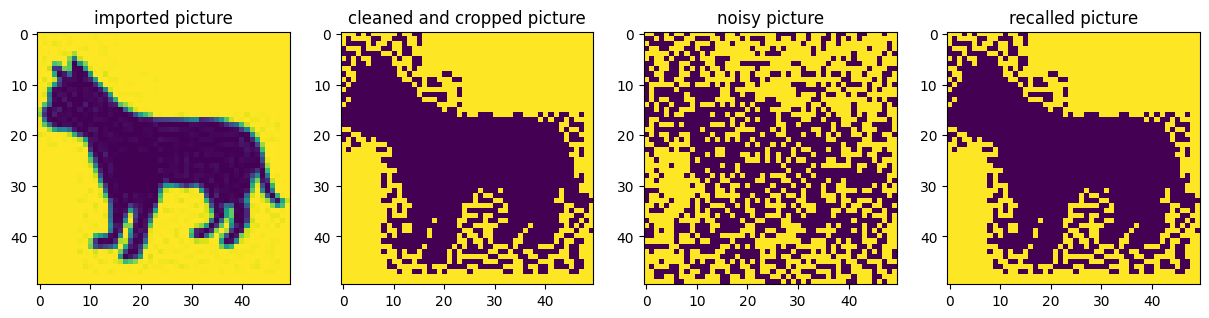

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as img

def trainer(vector):
    vector = vector.flatten()
    coefMat = np.outer(vector, vector)
    np.fill_diagonal(coefMat, 0)
    
    length = int(np.sqrt(len(vector)))

    vector = np.reshape(vector, [length, length])

    return coefMat

def prediction(corruptedVec,coefMat):
    corruptedVec = corruptedVec.flatten()
    temp = coefMat @ corruptedVec
    predictVec = np.where(temp > 0, 1, -1)
    length = int(np.sqrt(len(predictVec)))
    predictVec = np.reshape(predictVec, [length, length])

    return predictVec

def imageGenerator(imageVector, vmax=1):
    cleanImage = np.where(imageVector == vmax, 1, -1)
    noisyImage = cleanImage + np.random.normal(0, 2, imageVector.shape)
    noisyImage = np.where(noisyImage >= 0, 1, -1)
    return cleanImage, noisyImage

image = img.imread('1.png','w').copy()
vector, noisyVec = imageGenerator(image)
coefMatrix = trainer(vector)
predictedVec = prediction(noisyVec, coefMatrix)

plt.figure(figsize=(15,10))
plt.subplot(1,4,1)
plt.imshow(image)
plt.title('imported picture')

plt.subplot(1,4,2)
plt.imshow(vector);
plt.title('cleaned and cropped picture')

plt.subplot(1,4,3)
plt.imshow(noisyVec);
plt.title('noisy picture')

plt.subplot(1,4,4)
plt.imshow(predictedVec);
plt.title('recalled picture')
plt.show()